age             0
sex             0
SBP             0
BMI             0
HbA1c           0
TotalChol       0
LDL             0
TG              0
HDL             0
NLR             0
smoking         0
statin          0
CRP          1510
CACS            0
CACS_high       0
dtype: int64
üîπ AUC: 0.885297418630752
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        45
           1       0.91      0.97      0.94       297

    accuracy                           0.89       342
   macro avg       0.76      0.66      0.69       342
weighted avg       0.87      0.89      0.87       342



C:\Users\duih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


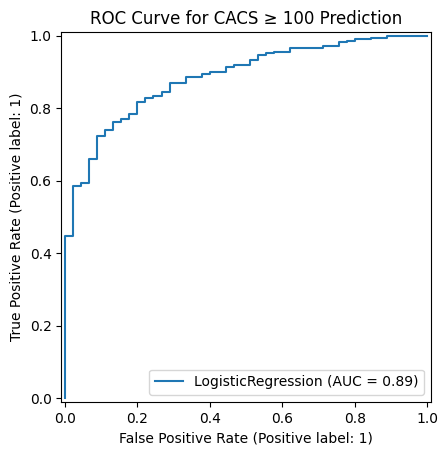

C:\Users\duih\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [19:15:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


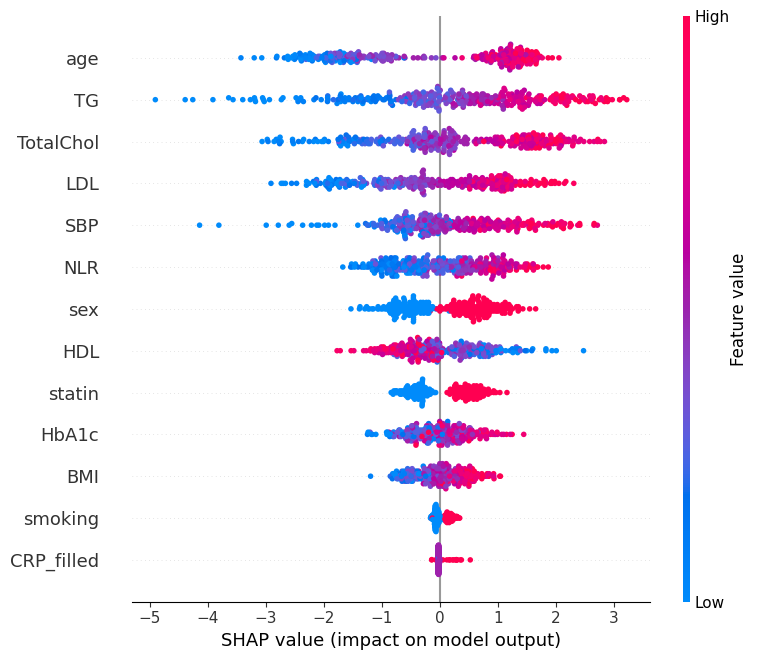

variable  coefficient direction  score
0          age     0.060855         +      5
1          sex     0.939609         +     10
2          SBP     0.032416         +      3
3          BMI     0.045277         +      5
4        HbA1c     0.237194         +      7
5    TotalChol     0.020154         +      1
6          LDL     0.021724         +      1
7           TG     0.017281         +      1
8          HDL    -0.036202         -      3
9          NLR     0.297278         +     10
10  CRP_filled     0.068476         +      5
11     smoking     0.084189         +      7
12      statin     0.674953         +     10

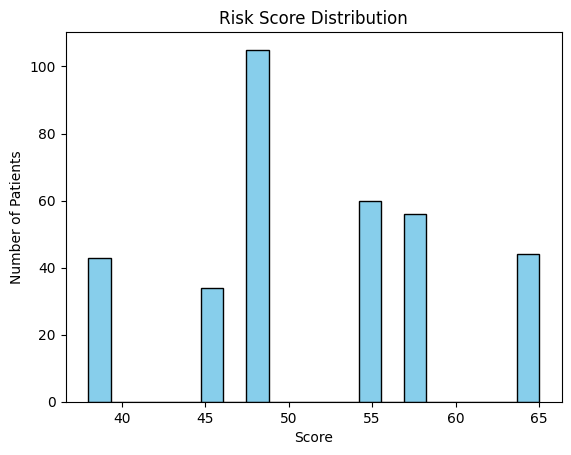

Q1 (Low-Intermediate Í≤ΩÍ≥Ñ): 48.0
Q2 (Intermediate-High Í≤ΩÍ≥Ñ): 55.0


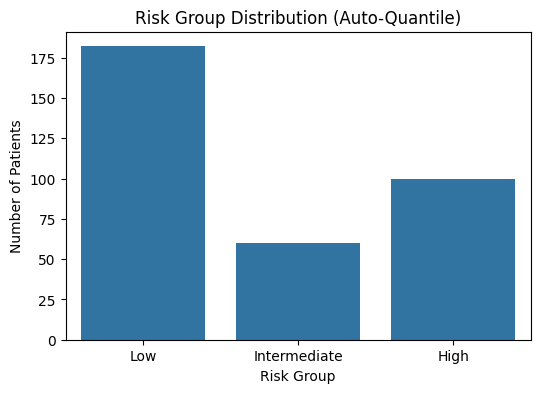

In [ ]:
# üì¶ 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∂àÎü¨Ïò§Í∏∞
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay
from xgboost import XGBClassifier

# üìÇ 2. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("CDW_CACS_NLR_CRP_1710_with_smoking_statin.csv")  # Í≤ΩÎ°ú ÌôïÏù∏ ÌïÑÏöî

# üîç 3. Í≤∞Ï∏°Ïπò ÌôïÏù∏ Î∞è Ï≤òÎ¶¨
print(df.isnull().sum())  # CRP Í≤∞Ï∏°Ïπò ÌôïÏù∏

# CRP Í≤∞Ï∏°ÏπòÎäî ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ±∞ÎÇò Î≥ÑÎèÑ Î≥ÄÏàò ÌôúÏö© Í∞ÄÎä•
df["CRP_filled"] = df["CRP"].fillna(df["CRP"].mean())

# üéØ 4. ÏûÖÎ†• Î≥ÄÏàò(X)ÏôÄ ÌÉÄÍ≤ü Î≥ÄÏàò(y) Ï†ïÏùò
X = df[[
    "age", "sex", "SBP", "BMI", "HbA1c", "TotalChol", "LDL",
    "TG", "HDL", "NLR", "CRP_filled", "smoking", "statin"
]]
y = df["CACS_high"]

# ‚úÇÔ∏è 5. Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# üìä 6. Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä Î™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞Ä
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("üîπ AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("ROC Curve for CACS ‚â• 100 Prediction")
plt.show()

# üìà 7. SHAP Î∂ÑÏÑù (XGBoost Í∏∞Î∞ò)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)

shap.initjs()
shap.summary_plot(shap_values, X_test)  # Ï†ÑÏ≤¥ feature Ï§ëÏöîÎèÑ ÏãúÍ∞ÅÌôî
shap.force_plot(shap_values[0])         # Ï≤´ Î≤àÏß∏ ÌôòÏûêÏóê ÎåÄÌïú ÏòàÏ∏° ÏÑ§Î™Ö

# üßÆ 8. Î¶¨Ïä§ÌÅ¨ Ï†êÏàò ÏãúÏä§ÌÖú ÏÉùÏÑ±
coef_df = pd.DataFrame({
    "variable": X.columns,
    "coefficient": model.coef_[0]
})
coef_df["score"] = pd.qcut(coef_df["coefficient"].abs(), q=5, labels=[1, 3, 5, 7, 10]).astype(int)
coef_df["direction"] = coef_df["coefficient"].apply(lambda x: "+" if x > 0 else "-")
score_table = coef_df[["variable", "coefficient", "direction", "score"]]
display(score_table)

# üìä 9. Î¶¨Ïä§ÌÅ¨ Ï†êÏàò ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
plt.barh(score_table["variable"], score_table["score"], color="skyblue")
plt.xlabel("Risk Score")
plt.title("Risk Score by Feature (CACS ‚â• 100 Prediction)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Î¶¨Ïä§ÌÅ¨ Ï†êÏàò Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®
plt.hist(X_test_scored["risk_score"], bins=20, color="skyblue", edgecolor="black")
plt.title("Risk Score Distribution")
plt.xlabel("Score")
plt.ylabel("Number of Patients")
plt.show()

# ÏÇ¨Î∂ÑÏúÑÏàò Í≥ÑÏÇ∞
q1 = X_test_scored["risk_score"].quantile(0.33)
q2 = X_test_scored["risk_score"].quantile(0.66)

print(f"Q1 (Low-Intermediate Í≤ΩÍ≥Ñ): {q1:.1f}")
print(f"Q2 (Intermediate-High Í≤ΩÍ≥Ñ): {q2:.1f}")

# ÏÇ¨Î∂ÑÏúÑ Í∏∞Î∞ò ÏúÑÌóòÍµ∞ Î∂ÑÎ•ò Ìï®Ïàò
def assign_risk_group_dynamic(score):
    if score <= q1:
        return "Low"
    elif score <= q2:
        return "Intermediate"
    else:
        return "High"

# ÏúÑÌóòÍµ∞ Ïª¨Îüº Ï∂îÍ∞Ä
X_test_scored["risk_group"] = X_test_scored["risk_score"].apply(assign_risk_group_dynamic)

import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=X_test_scored, x="risk_group", order=["Low", "Intermediate", "High"])
plt.title("Risk Group Distribution (Auto-Quantile)")
plt.xlabel("Risk Group")
plt.ylabel("Number of Patients")
plt.show()


